# <span style='font-family:"Times New Roman"'><font color='Midnightblue'> **Bitcoin Tweets Sentiment Analysis**

<img src = "https://images.news18.com/ibnlive/uploads/2021/11/bitcoin-2-16379233633x2.png?impolicy=website&width=510&height=356" width=60%>

#### <span style='font-family:"Times New Roman"'>
Given the current worldwide issues, increasing inflation rates, and growing uncertainties regarding the value of cryptocurrencies, I thought I'd take a look at the twitter activities and sentiment of tweets posted in regards to Bitcoin. For this purpose, I have decided to analyze the tweets posted from around the beginning of the year, and see how users' confidence in the cryptocurrency is evolving. The dataset of the tweets was acquired through Kaggle, and I have also added an analysis of the Bitcoin prices in the period in US dollars. The dataset of the Bitcoin prices was also acquired through Yahoo.

In [1]:
#By Ysmin-g
#The twitter dataset studied here can be accessed and downloaded via Kaggle
#and the dataset of Bitcoin prices can be accessed and downloaded via Yahoo

In [4]:
#Importing the required libraries
#importing the libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import re
import preprocessor as p
import string
from wordcloud import WordCloud
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from PIL import Image

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#importing the dataset
tw_raw=pd.read_csv('/content/bitcoin_tweets.csv')
tw_raw.head()

,id,text,lang,author_id,created_at
0,1.498162e+18,@BluesparrowC @BitcoinMagazine @nayibbukele @c...,und,1.494229e+18,2022-02-28T05:02:11.000Z
1,1.498162e+18,RT @AirdropKingNews: @AirdropKingNews Our Par...,en,1.370736e+18,2022-02-28T05:02:11.000Z
2,1.498162e+18,I believe It is a wonderful project. The proje...,en,1.461952e+18,2022-02-28T05:02:11.000Z
3,1.498162e+18,RT @Arad064083512: @SpyWolfWarriors @SpyWolfNe...,en,1.461254e+18,2022-02-28T05:02:10.000Z
4,1.498162e+18,RT @DiaboloTrading: 🔔Encore une société du @Na...,fr,1.474004e+18,2022-02-28T05:02:10.000Z


In [8]:
#importing the dataset of tweets
btc_raw=tw_raw[tw_raw['lang']=='en']
btc_raw.head()

,id,text,lang,author_id,created_at
1,1.498162e+18,RT @AirdropKingNews: @AirdropKingNews Our Par...,en,1.370736e+18,2022-02-28T05:02:11.000Z
2,1.498162e+18,I believe It is a wonderful project. The proje...,en,1.461952e+18,2022-02-28T05:02:11.000Z
3,1.498162e+18,RT @Arad064083512: @SpyWolfWarriors @SpyWolfNe...,en,1.461254e+18,2022-02-28T05:02:10.000Z
5,1.498162e+18,RT @saxenasaheb: If you've not heard of Bitcoi...,en,6.063599e+08,2022-02-28T05:02:10.000Z
7,1.498162e+18,RT @autocuidadx: I went to a second hand store...,en,2.933051e+08,2022-02-28T05:02:10.000Z


In [9]:
#dropping some of the columns 
btc_raw.drop(['id'],axis=1,inplace=True)
btc_raw.drop(['lang'],axis=1,inplace=True)
btc_raw.drop(['author_id'],axis=1,inplace=True)

In [10]:
#dropping duplicate values
btc_raw=btc_raw.drop_duplicates('text',keep='first')

In [11]:
#converting the date of the tweets to the appropriate format
btc_raw['date'] = pd.to_datetime(btc_raw.created_at)
btc_raw['date'] = btc_raw.date.dt.strftime('%m/%d/%Y')

In [12]:
#seperating the hashtags, mentions, retweets, and links of the tweets
btc_raw['hashtag'] = btc_raw['text'].apply(lambda x: re.findall(r"#(\w+)", x))
btc_raw['mention'] = btc_raw['text'].apply(lambda x: re.findall(r"@(\w+)", x))
btc_raw['processed'] = btc_raw['text'].apply(lambda x: p.clean(x))
btc_raw['include retweet']=btc_raw['processed'].apply(lambda x: True if "RT" in x else False )
btc_raw['include URL']=btc_raw['processed'].apply(lambda x: True if "http" in x else False )
btc_raw['URL'] = btc_raw['text'].apply(lambda x: re.sub(r'https\S+', '', str(x)))

btc_raw.head()

,text,created_at,date,hashtag,mention,processed,include retweet,include URL,URL
1,RT @AirdropKingNews: @AirdropKingNews Our Par...,2022-02-28T05:02:11.000Z,02/28/2022,[],"[AirdropKingNews, AirdropKingNews, Nbattery_coin]",": Our Partnership is guys, support them all to...",False,False,RT @AirdropKingNews: @AirdropKingNews Our Par...
2,I believe It is a wonderful project. The proje...,2022-02-28T05:02:11.000Z,02/28/2022,"[Airdrops, Unityswap, Bitcoin, AirdropDetective]","[NasrullahTarek, OveyIslam82, mstfaridaakter]",I believe It is a wonderful project. The proje...,False,False,I believe It is a wonderful project. The proje...
3,RT @Arad064083512: @SpyWolfWarriors @SpyWolfNe...,2022-02-28T05:02:10.000Z,02/28/2022,[],"[Arad064083512, SpyWolfWarriors, SpyWolfNetwor...",: Did you get scammed? The good guys are here ...,False,False,RT @Arad064083512: @SpyWolfWarriors @SpyWolfNe...
5,RT @saxenasaheb: If you've not heard of Bitcoi...,2022-02-28T05:02:10.000Z,02/28/2022,[],[saxenasaheb],": If you've not heard of Bitcoin and Ethereum,...",False,False,RT @saxenasaheb: If you've not heard of Bitcoi...
7,RT @autocuidadx: I went to a second hand store...,2022-02-28T05:02:10.000Z,02/28/2022,[],[autocuidadx],: I went to a second hand store and picked up ...,False,False,RT @autocuidadx: I went to a second hand store...


In [13]:
#removing the previous column of dates
btc_raw.drop(['created_at'],axis=1,inplace=True)

In [14]:
#cleaning the data
def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation]) #remove punctuation characters
    return text.lower()

In [15]:
#removing the stopwords
def stp_text(text):
    stp_words=stopwords.words("english") #removing stopwords
    text= text.apply( lambda x: ' '.join([word for word in x.split() if word not in (stp_words)]))
    return text

In [16]:
btc_raw['tweet context']=btc_raw['processed'].apply(lambda x: clean_text(x))
btc_raw['tweet context']=stp_text(btc_raw['tweet context'])
btc_raw.head()

,text,date,hashtag,mention,processed,include retweet,include URL,URL,tweet context
1,RT @AirdropKingNews: @AirdropKingNews Our Par...,02/28/2022,[],"[AirdropKingNews, AirdropKingNews, Nbattery_coin]",": Our Partnership is guys, support them all to...",False,False,RT @AirdropKingNews: @AirdropKingNews Our Par...,partnership guys support togethertelegram group
2,I believe It is a wonderful project. The proje...,02/28/2022,"[Airdrops, Unityswap, Bitcoin, AirdropDetective]","[NasrullahTarek, OveyIslam82, mstfaridaakter]",I believe It is a wonderful project. The proje...,False,False,I believe It is a wonderful project. The proje...,believe wonderful project projector lot fascin...
3,RT @Arad064083512: @SpyWolfWarriors @SpyWolfNe...,02/28/2022,[],"[Arad064083512, SpyWolfWarriors, SpyWolfNetwor...",: Did you get scammed? The good guys are here ...,False,False,RT @Arad064083512: @SpyWolfWarriors @SpyWolfNe...,get scammed good guys weve got back2
5,RT @saxenasaheb: If you've not heard of Bitcoi...,02/28/2022,[],[saxenasaheb],": If you've not heard of Bitcoin and Ethereum,...",False,False,RT @saxenasaheb: If you've not heard of Bitcoi...,youve heard bitcoin ethereum youre probably li...
7,RT @autocuidadx: I went to a second hand store...,02/28/2022,[],[autocuidadx],: I went to a second hand store and picked up ...,False,False,RT @autocuidadx: I went to a second hand store...,went second hand store picked book called digi...


In [17]:
#only exporting the columns that we need in a new dataframe
bitcoin_tw=btc_raw[['tweet context','date']]
bitcoin_tw.head()

,tweet context,date
1,partnership guys support togethertelegram group,02/28/2022
2,believe wonderful project projector lot fascin...,02/28/2022
3,get scammed good guys weve got back2,02/28/2022
5,youve heard bitcoin ethereum youre probably li...,02/28/2022
7,went second hand store picked book called digi...,02/28/2022


## <span style='font-family:"Times New Roman"'><font color='Midnightblue'> **Sentiment Analysis of the cleaned tweets**

In [18]:
#sentiment analysis
senti_analyzer = SentimentIntensityAnalyzer()

bitcoin_tw['compound'] = [senti_analyzer.polarity_scores(x)['compound'] for x in bitcoin_tw['tweet context']]
bitcoin_tw['neg'] = [senti_analyzer.polarity_scores(x)['neg'] for x in bitcoin_tw['tweet context']]
bitcoin_tw['neu'] = [senti_analyzer.polarity_scores(x)['neu'] for x in bitcoin_tw['tweet context']]
bitcoin_tw['pos'] = [senti_analyzer.polarity_scores(x)['pos'] for x in bitcoin_tw['tweet context']]

In [19]:
#get final result as column
def senti_results(sentiment):
  if sentiment == 0:
    return 'Neutral'
  elif sentiment > 0:
    return 'Positive'
  else:
    return 'Negative'

bitcoin_tw['sentiment']=bitcoin_tw['compound'].apply(senti_results)

In [20]:
bitcoin_tw.tail()

,tweet context,date,compound,neg,neu,pos,sentiment
1415679,take minute join dont miss free giveaway guys,06/25/2022,-0.0150,0.238,0.441,0.321,Negative
1415691,im playing card draw next block mined learn play,06/25/2022,0.0772,0.221,0.458,0.321,Positive
1415693,flip amp dominate early adopter betting big,06/25/2022,-0.1280,0.200,0.800,0.000,Negative
1415694,going announce exciting new features community...,06/25/2022,0.7506,0.000,0.610,0.390,Positive
1415697,take minute join dont miss free giveaway guys,06/25/2022,-0.0150,0.238,0.441,0.321,Negative


## <span style='font-family:"Times New Roman"'><font color='Midnightblue'> **Exploring the Results**

In [21]:
#Defining a custom palette
palette={"Positive": "#2BA84A", "Negative": "#D62828", "Neutral": "#A9DEF9"}
palette_df=pd.DataFrame(palette.items(), columns=['sentiment', 'color'])
palette_df

,sentiment,color
0,Positive,#2BA84A
1,Negative,#D62828
2,Neutral,#A9DEF9


In [22]:
#An overview of the tweets' sentiment

sentimenta=pd.DataFrame(bitcoin_tw['sentiment'].value_counts(normalize=False))
sentimenta=sentimenta.reset_index().rename(columns = {'index':'sentiment','sentiment':'count'})

sentiment=pd.merge(sentimenta, palette_df, on=['sentiment'],how='outer')

fig = go.Figure(data=[go.Pie(labels=sentiment['sentiment'], values=sentiment['count'],textinfo='label',
                     name='Sentiment of the tweets', 
                     marker_colors=sentiment['color'],hole=0.5)])
fig.show()

#### <span style='font-family:"Times New Roman"'><font color='Midnightblue'> **Here I have added the bitcoin prices in US Dollars, to get an additional understanding of the prices, and the correlation of sentiment tweets and the prices**

In [23]:
#Getting the bitcoin prices
btc_prices=pd.read_csv('/content/bitcoin_USD.csv')
btc_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,33070867190
1,2021-06-03,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,35460750427
2,2021-06-04,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,41831090187
3,2021-06-05,36880.156250,37917.714844,34900.414063,35551.957031,35551.957031,35959473399
4,2021-06-06,35538.609375,36436.421875,35304.578125,35862.378906,35862.378906,28913440585


In [24]:
btc_prices['date'] = pd.to_datetime(btc_prices.Date)
btc_prices['date'] = btc_prices.date.dt.strftime('%m/%d/%Y')

In [25]:
btc_prices.drop(['Date'],axis=1,inplace=True)

In [26]:
len(btc_prices['date'].unique())

390

In [27]:
btc_prices.head()

,Open,High,Low,Close,Adj Close,Volume,date
0,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,33070867190,06/02/2021
1,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,35460750427,06/03/2021
2,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,41831090187,06/04/2021
3,36880.156250,37917.714844,34900.414063,35551.957031,35551.957031,35959473399,06/05/2021
4,35538.609375,36436.421875,35304.578125,35862.378906,35862.378906,28913440585,06/06/2021


#### <span style='font-family:"Times New Roman"'><font color='Midnightblue'> **Insights on the positive and negative tweets and their potential relation to Bitcoin prices**

In [28]:
btc_tw=bitcoin_tw[['date','sentiment','tweet context']]

In [29]:
btc_twa=btc_tw.groupby(by=["date", "sentiment"]).size().reset_index(name='counts')
btc_pricesa=btc_prices[btc_prices['date'].isin(btc_tw['date'])]
btc_twa.shape

(354, 3)

In [30]:
btc_twb=btc_tw.groupby(by=["date"]).size().reset_index(name='counts')

In [31]:
#getting the wordclouds of the positive and negative tweets
def word_cl(dta,color):
    dtb=dta.to_string()
    cloud_image = "/content/twitter_logo_mask.png"
    mask = np.array(Image.open(cloud_image))
    wcloud = WordCloud(max_font_size=50, max_words=100, 
                       mask=mask
                       ,background_color="#001233",
                       height=2000,colormap=color).generate(dtb)
    plt.figure(figsize=(16,8) )
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

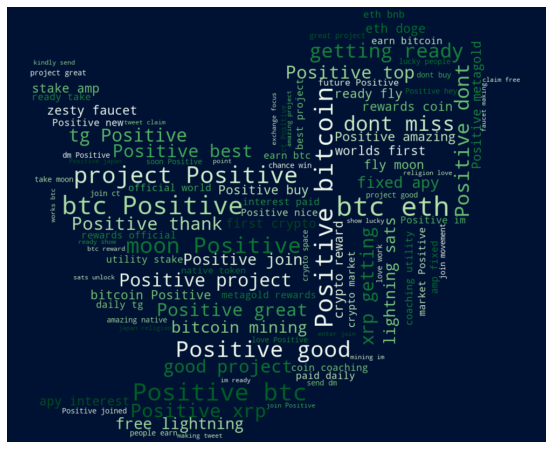

In [32]:
word_cl(btc_tw[btc_tw['sentiment']=='Positive'],"Greens")

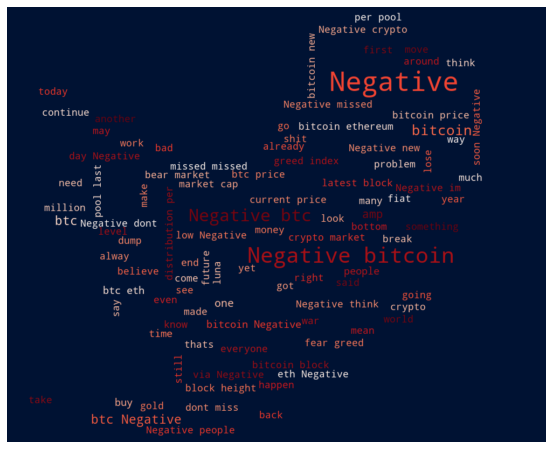

In [33]:
word_cl(btc_tw[btc_tw['sentiment']=='Negative'],"Reds")

In [34]:
cbtc=make_subplots(rows=2, cols=1, shared_xaxes=True,
                  subplot_titles=("Bitcoin Prices in the period",
                                  "Volume of Transactions"))


cbtc.add_trace(go.Candlestick(x = btc_pricesa['date'],open=btc_pricesa['Open'],
                             close=btc_pricesa['Close'],high=btc_pricesa['High'],
                             low=btc_pricesa['Low'],
                             increasing_line_color= '#6930C3',
                           decreasing_line_color= '#E36414',name='USD Price'),1,1)


cbtc.add_trace(go.Bar(x=btc_pricesa['date'], y=btc_pricesa['Volume'],
                   marker_color ='#001d3d',
                   marker_line_color='#001d3d',name='Volume in USD'),2,1)

cbtc.show()

In [35]:
twpos=btc_twa[btc_twa['sentiment']=='Positive']
twneg=btc_twa[btc_twa['sentiment']=='Negative']
twneu=btc_twa[btc_twa['sentiment']=='Neutral']

f = make_subplots(rows=2, cols=1, shared_xaxes=True,
                  subplot_titles=("Adjusted Closing Bitcoin Prices in the period",
                                  "Tweets' Sentiment Count in the period"))
                       

f.add_trace(go.Scatter(x=btc_pricesa['date'], y=btc_pricesa['Adj Close'], 
                         line=dict(color="#240046")),row = 1, col = 1)

f.update_layout(xaxis_rangeslider_visible=False)


f.add_trace(go.Scatter(x=btc_pricesa['date'], y=twpos['counts'], 
                         line=dict(color=palette.get('Positive')), 
                       name='Positive'),row = 2, col = 1)


f.add_trace(go.Scatter(x=btc_pricesa['date'], y=twneg['counts'], 
                         line=dict(color=palette.get('Negative'))),row = 2, col = 1)


f.add_trace(go.Scatter(x=btc_pricesa['date'], y=twneu['counts'], 
                         line=dict(color=palette.get('Neutral'))),row = 2, col = 1)
f.update_xaxes(rangeslider= {'visible':False}, row=2, col=1)

f.update_layout(autosize=True, title_text='Bitcoin Sentiment vs Price Analysis',showlegend=False)
f.show()

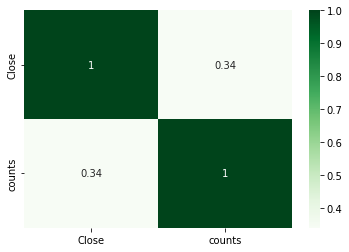

In [36]:
#getting the correlation of positive tweet numbers and closing price
btc_pos_pra=pd.merge(twpos, btc_pricesa, on=['date'],how='outer')
btc_pos_pr=btc_pos_pra[['Close','counts']]
corr = btc_pos_pr.corr(method = 'spearman')
sns.heatmap(corr, annot = True,cmap="Greens")
plt.show()

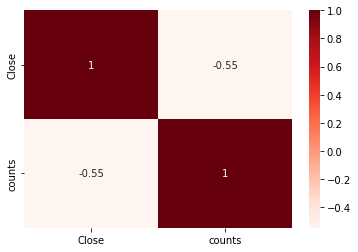

In [37]:
#getting the correlation of negative tweet numbers and closing price
btc_neg_pra=pd.merge(twneg, btc_pricesa, on=['date'],how='outer')
btc_neg_pr=btc_neg_pra[['Close','counts']]
corr = btc_neg_pr.corr(method = 'spearman')
sns.heatmap(corr, annot = True, cmap="Reds")
plt.show()

#### <span style='font-family:"Times New Roman"'><font color='Midnightblue'> Considering the dataset and the analysis, these are some of the notes that could be made:

<span style='font-family:"Times New Roman"'>* There appears to be a rise in the number of tweets with a negative sentiment in the period, particularly at the end of April.

<span style='font-family:"Times New Roman"'>* There appears to be a closer negative relationship among the number of negative tweets and the closing price of Bitcoin in the period compared to the number of positive tweets, which the recent inflation rates and the decreased interest in risk assets and the recent price fall could explain.

<span style='font-family:"Times New Roman"'>* As suspected, the relationship between the sentiment of the tweets and the price of Bitcoin in this period is relatively strong, and this relationship is most likely to have affected market and customer behavior in this period, and its near future.

